## Example for using the sigmaclipping by Baeza-Villagra, K et al 2024

In [7]:
import Fourier_functions
import SigmaClippling_functions
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [13]:
#To be changed by the user
period = 0.77102892 #period
T0 = 7000.39700 #T0
n_r = 7 #Fourier order
LighCurve= ['OGLE-BLG-RRLYR-11208.txt'] #arch : HJD,Mag,Err,band. 

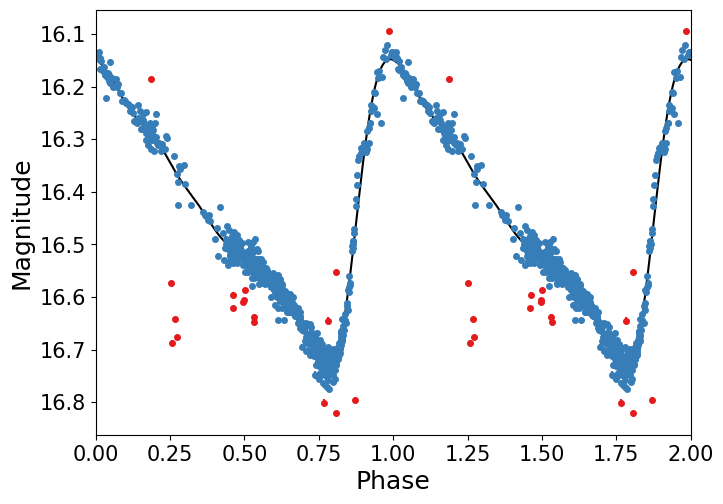

In [14]:
#Note that this example is made for the r-band only. The reader can extend it to more bands.

for arch in LighCurve:
    df = pd.read_csv('./OGLE-BLG-RRLYR-11208.txt')
    bands = ['r']
    m_X = np.arange(0,1.01,0.001)
    fig, ax = plt.subplots(figsize=(7, 5))

    for band in bands:
        df_band  = df.loc[ df['band'] == band ].reset_index(drop=True)
        t1= np.array(df_band.HJD)
        mag= np.array(df_band.Mag)
        err= np.array(df_band.Err)
        phase1 = ((t1 - T0)/(period)) - (np.floor((t1 - T0)/(period)))
            
        if band == 'r':
            model, coeff = Fourier_functions.fourier(T0, period, t1, mag, n_r)
            evaluate = Fourier_functions.evaluar(T0, model, (m_X + (T0 / period)) * period, period, mag, n_r)  
            ax.plot(m_X, evaluate, c='k')
            ax.plot(m_X+1, evaluate, c='k')
            
            dist_list, index_list, original_index_list = SigmaClippling_functions.dist_euclidiana_min(mag, phase1, m_X, evaluate)
            ell_list = SigmaClippling_functions.ell(evaluate, m_X, index_list)
            sigma_l, sigma_d = SigmaClippling_functions.sigmas(evaluate, m_X, original_index_list, err)
            obs_clipped, phase_clipped, err_clipped, t_clipped, obs_out, phase_out, err_out, t_out = SigmaClippling_functions.remove_iterativo(dist_list, sigma_d, mag, phase1, err, t1, s=2, max_iter=1)

            ax.errorbar(phase_clipped, obs_clipped, err_clipped,  ms=4, fmt='o', color='#377eb8', label='Data remaining')
            ax.errorbar(phase_out, obs_out, err_out, ms=4, fmt='o', color='#e41a1c', label='Data clipped')
            ax.errorbar(np.array(phase_clipped) +1, obs_clipped, err_clipped,  ms=4, fmt='o', color='#377eb8')
            ax.errorbar(np.array(phase_out) +1, obs_out, err_out, ms=4, fmt='o', color='#e41a1c')
                   
    ax.set_xlabel('Phase', fontsize=18)
    ax.set_ylabel('Magnitude',fontsize=18)
    ax.tick_params(labelsize= 15)
    ax.invert_yaxis()
    ax.set_xlim([0.0, 2.0])
    plt.subplots_adjust(right=0.98 ,bottom=0.13,left = 0.13, top = 0.98)
    plt.show()